# Lab 6: spaCy

Today, you will learn about spaCy, a robust and widely used library for NLP. This lab is based on [a tutorial](https://course.spacy.io/en/)  by Ines Montani, one of the creators of spaCy. One fun note - the other founder of spaCy completed his PhD at USyd!

First, we need to install the library:

In [1]:
!pip install spacy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Core parts of spaCy

At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp".

For example, to create an English `nlp` object, you can `import spacy` and use the `spacy.blank` method to create a blank English pipeline. You can use the `nlp` object like a function to analyze text.

It contains all the different components in the pipeline.

It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages.

In [2]:
# Import spaCy
import spacy

# Create a blank English nlp object
nlp = spacy.blank("en")

/Users/jkum0593/teaching/comp5046-2024/env-5046/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


When you process a text with the `nlp` object, spaCy creates a `Doc` object – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

Each document contains a series of tokens

![image.png](https://course.spacy.io/doc.png)

`Token` objects represent the tokens in a document – for example, a word or a punctuation character.

To get a token at a specific position, you can index into the doc.

`Token` objects also provide various attributes that let you access more information about the tokens. For example, the `.text` attribute returns the verbatim token text.

The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index.
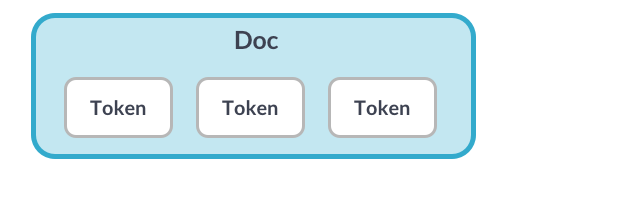

In [3]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Index into the Doc to get a single Token
token = doc[1]

# Get the token text via the .text attribute
print(token.text)

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

world
Hello
world
!


A `Span` object is a slice of the document consisting of one or more tokens. It's only a view of the `Doc` and doesn't contain any data itself.

![image.png](https://course.spacy.io/doc_span.png)

To create a span, you can use Python's slice notation. For example, `1:3` will create a slice starting from the token at position 1, up to – but not including! – the token at position 3.
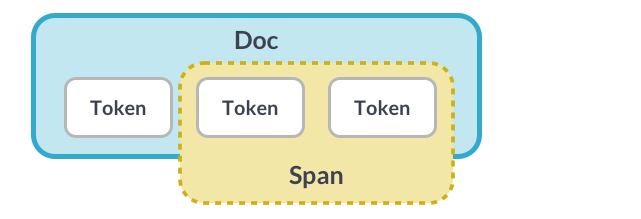

In [4]:
doc = nlp("Hello NLP class!")

# A slice from the Doc is a Span object
span = doc[1:3]

# Get the span text via the .text attribute
print(span.text)

NLP class


Here you can see some of the available token attributes:

`i` is the index of the token within the parent document.

`text` returns the token text.

`is_alpha`, `is_punct` and `like_num` return boolean values indicating whether the token consists of alphabetic characters, whether it's punctuation or whether it resembles a number. For example, a token "10" – one, zero – or the word "ten" – T, E, N.

These attributes are also called lexical attributes: they refer to the entry in the vocabulary and don't depend on the token's context.

In [5]:
doc = nlp("It costs $5.")
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


Now let's try applying what you learned above.

- Use `spacy.blank` to create a blank English (`"en"`) `nlp` object.
- Create a `doc` for the sentence "This is a sentence." and print its text.

In [6]:
# TODO

# Solution
# Import spaCy
import spacy

# Create the English nlp object
nlp = spacy.blank("en")

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


spaCy supports many different languages.

Try doing the same thing, but this time in German (`"de"`) with "Das ist ein Satz."

In [7]:
# TODO

# Solution
# Import spaCy
import spacy

# Create the German nlp object
nlp = spacy.blank("de")

# Process a text (this is German for: "This is a sentence.")
doc = nlp("Das ist ein Satz.")

# Print the document text
print(doc.text)

Das ist ein Satz.


And again, in Spanish (`"es"`) with "Esta es una frase."

In [8]:
# TODO

# Solution
# Import spaCy
import spacy

# Create the Spanish nlp object
nlp = spacy.blank("es")

# Process a text (this is Spanish for: "This is a sentence.")
doc = nlp("Esta es una frase.")

# Print the document text
print(doc.text)

Esta es una frase.


When you call `nlp` on a string, spaCy first tokenizes the text and creates a document object. In this exercise, you’ll learn more about the `Doc`, as well as its views `Token` and `Span`.

Step 1
- Use `spacy.blank` to create the English `nlp` object for the sentence "I like tree kangaroos and narwhals.".
- Process the text and instantiate a `Doc` object.
- Select the first token of the `Doc` and print its `text`.
- Create a slice of the `Doc` for the tokens “tree kangaroos” and “tree kangaroos and narwhals”.

In [9]:
# TODO

# Solution
# Import spaCy and create the English nlp object
import spacy

nlp = spacy.blank("en")

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

I
tree kangaroos
tree kangaroos and narwhals


Now, let's use spaCy’s Doc and Token objects, and lexical attributes to find things in text.

Try to find every time a percentage is mentioned. You’ll be looking for a token that is a number, followed by a token that is a percent sign.

- Create a `Doc` for the text "In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are."
- Use the `like_num` token attribute to check whether a token in the `doc` resembles a number.
- Get the token following the current token in the document. Remember that `token.i` gives you the position of a token in a document.
- Check whether the next token’s `text` attribute is a percent sign ”%“.

In [10]:
# TODO

# Solution
import spacy

nlp = spacy.blank("en")

# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 60
Percentage found: 4


So far, we've used the `nlp` module on its own, with some built-in capabilities (e.g., breaking text up into a series of tokens).

To do more, we use *trained pipelines*. These are models that enable spaCy to predict linguistic attributes in context, e.g.,
- Part-of-speech tags
- Syntactic dependencies
- Named entities

Trained pipeline components have statistical models that enable spaCy to make predictions in context.  Pipelines are trained on large datasets of labeled examples. They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.

spaCy provides a number of trained pipeline packages you can download using the `spacy download` command. For example, the "en_core_web_sm" package is a small English pipeline that supports all core capabilities and is trained on web text.

In [11]:
!python -m spacy download en_core_web_sm

/Users/jkum0593/teaching/comp5046-2024/env-5046/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


The `spacy.load` method loads a pipeline package by name and returns an nlp object. The package provides the binary weights that enable spaCy to make predictions. It also includes the vocabulary, meta information about the pipeline and the configuration file used to train it. It tells spaCy which language class to use and how to configure the processing pipeline.

In [12]:
nlp = spacy.load("en_core_web_sm")

## Part of Speech tags

Let's take a look at the model's predictions. In this example, we're using spaCy to predict part-of-speech tags, the word types in context.

The code prints both `token.pos_` and `token.pos`. Attributes that return strings usually end with an underscore. Attributes without the underscore return an integer ID value.

Here, the model correctly predicts all of the POS tags.

In [13]:
import spacy

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_, token.pos)

She PRON 95
ate VERB 100
the DET 90
pizza NOUN 92


## Syntax

In addition to the part-of-speech tags, we can also predict syntactic structures. As a reminder, syntax captures how words in text are related. For example, whether a word is the subject or object of the main verb in the sentence.

The `.dep_` attribute returns the predicted dependency label.

The `.head` attribute returns the syntactic head token. You can also think of it as the parent token this word is modifying / attached to.

In [14]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:

The pronoun "She" is a nominal subject attached to the verb – in this case, to "ate".

The noun "pizza" is a direct object attached to the verb "ate". It is eaten by the subject, "she".

The determiner "the", also known as an article, is attached to the noun "pizza".

We can draw the structure like this (as generated by displaCy, another part of the library):

![image.png](https://course.spacy.io/dep_example.png)

## Named Entities

Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

The `doc.ents` property lets you access the named entities predicted by the named entity recognition model.

![image.png](https://course.spacy.io/ner_example.png)

It returns an iterator of `Span` objects, so we can print the entity text and the entity label using the `.label_` attribute.

In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.
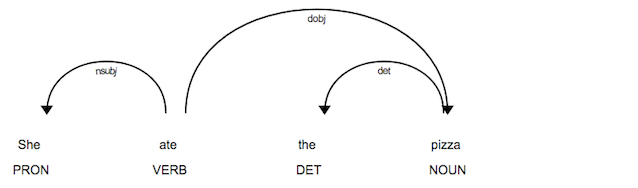
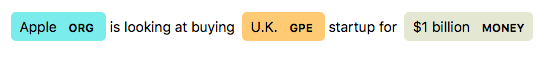

In [15]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


A quick tip: To get definitions for the most common tags and labels, you can use the `spacy.explain` helper function.

For example, "GPE" for geopolitical entity isn't exactly intuitive – but `spacy.explain` can tell you that it refers to countries, cities and states.

The same works for part-of-speech tags and dependency labels.

In [16]:
print("Named entity label GPE means:\n", spacy.explain("GPE"))
print("POS tag NNP means:\n", spacy.explain("NNP"))
print("Dependency type dobj means:\n", spacy.explain("dobj"))

Named entity label GPE means:
 Countries, cities, states
POS tag NNP means:
 noun, proper singular
Dependency type dobj means:
 direct object


# Task 1

Write code to do the following:

- Download the `en_core_web_md` model (a slightly larger and more accurate model)
- Make one `nlp` object using the `en_core_web_md` model and one using the `en_core_web_sm` model from above
- Run each one on "Fruit flies like a banana"
- Print out the POS tags and dependencies produced by each model and identify any differences

In [17]:
# TODO

# Solution
!python -m spacy download en_core_web_md

/Users/jkum0593/teaching/comp5046-2024/env-5046/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [18]:
# Solution continued

# Load the small English pipeline
nlp_small = spacy.load("en_core_web_sm")
nlp_medium = spacy.load("en_core_web_md")

# Process a text
text = "Fruit flies like a banana"
doc_small = nlp_small(text)
doc_medium = nlp_medium(text)

# Iterate over the tokens
for i in range(len(doc_small)):
    print(doc_small[i])
    if doc_small[i].pos_ != doc_medium[i].pos_:
        print("POS difference:", doc_small[i].pos_, doc_medium[i].pos_)
    if doc_small[i].dep_ != doc_medium[i].dep_:
        print("Dep difference:", doc_small[i].dep_, doc_medium[i].dep_)

Fruit
flies
POS difference: NOUN VERB
like
a
banana


# Matching

Next, we'll take a look at spaCy's matcher, which lets you write rules to find words and phrases in text.

If you are familiar with regular expressions, then they may be what you think of when looking for specific patterns in text. However, they are over strings. Here, we want to define patterns over `Doc` and `Token` objects too. For example, we might want to find the word "duck" but only if it's a verb, not a noun.

Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values. To use a pattern, we initialise it with the shared vocabulary, `nlp.vocab`. You'll learn more about this later – for now, just remember to always pass it in. The `matcher.add` method lets you add a pattern. The first argument is a unique ID to identify which pattern was matched. The second argument is a list of patterns.

To match the pattern on a text, we can call the matcher on any doc. This will return the matches. Each tuple consists of three values: the  ID of the pattern that matched, the start index and the end index of the matched span. This means we can iterate over the matches and create a Span object: a slice of the doc at the start and end index.

In [19]:
# Import the Matcher
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("iPhone X news! Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

# Iterate over the matches
for pattern_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print('"{}" - match for pattern {} in span ({}, {})'.format(matched_span.text, pattern_id, start, end))

"iPhone X" - match for pattern 9528407286733565721 in span (0, 2)
"iPhone X" - match for pattern 9528407286733565721 in span (5, 7)


Here's an example of a more complex pattern using lexical attributes.

We're looking for a five token sequence:
- A token consisting of only digits.
- Three case-insensitive tokens for "fifa", "world" and "cup" (`LOWER` indicates that once lowercased, the token must match the one we provide).
- A token that consists of punctuation.

In [20]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]
matcher = Matcher(nlp.vocab)
matcher.add("SOCCER_PATTERN", [pattern])

doc = nlp("2018 FIFA World Cup: France won!")

matches = matcher(doc)
for pattern_id, start, end in matches:
    matched_span = doc[start:end]
    print('"{}" - match for pattern {} in span ({}, {})'.format(matched_span.text, pattern_id, start, end))

"2018 FIFA World Cup:" - match for pattern 7469410445798573543 in span (0, 5)


In this example, we're looking for two tokens. A verb with the lemma "love", followed by a noun. Remember that a lemma is a canonical form of a word that has multiple variations, e.g., 'run' is a lemma for 'ran', 'running', and 'run'.

In [21]:
pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]
matcher = Matcher(nlp.vocab)
matcher.add("LOVE_PATTERN", [pattern])

doc = nlp("I loved vanilla but now I love chocolate more.")

matches = matcher(doc)
for pattern_id, start, end in matches:
    matched_span = doc[start:end]
    print('"{}" - match for pattern {} in span ({}, {})'.format(matched_span.text, pattern_id, start, end))

"loved vanilla" - match for pattern 4358456325055851256 in span (1, 3)
"love chocolate" - match for pattern 4358456325055851256 in span (6, 8)


Operators and quantifiers let you define how often a token should be matched. They can be added using the "OP" key. "OP" can have one of four values:

- An "!" negates the token, so it's matched 0 times.
- A "?" makes the token optional, and matches it 0 or 1 times.
- A "+" matches a token 1 or more times.
- And finally, an "*" matches 0 or more times.

Operators can make your patterns a lot more powerful, but they also add more complexity – so use them wisely.

Here, the "?" operator makes the determiner token optional, so it will match a token with the lemma "buy", an optional article and a noun.

In [22]:
pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]
matcher = Matcher(nlp.vocab)
matcher.add("BUY_PATTERN", [pattern])

doc = nlp("I bought a smartphone. Now I'm buying apps.")

matches = matcher(doc)
for pattern_id, start, end in matches:
    matched_span = doc[start:end]
    print('"{}" - match for pattern {} in span ({}, {})'.format(matched_span.text, pattern_id, start, end))

"bought a smartphone" - match for pattern 8301083161022457728 in span (1, 4)
"buying apps" - match for pattern 8301083161022457728 in span (8, 10)


Try writing code to match names of iOS versions in the text below, e.g., "iOS 5", and "iOS 13"

In [23]:
text = """After making the iOS update you won't notice a radical system-wide
redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of
iOS 11's furniture remains the same as in iOS 10. But you will discover some
tweaks once you delve a little deeper."""

# TODO

# Solution
matcher = Matcher(nlp.vocab)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", [pattern])

# Iterate over the matches and print the span text
doc = nlp(text)
matches = matcher(doc)
for pattern_id, start, end in matches:
    matched_span = doc[start:end]
    print('"{}" - match for pattern {} in span ({}, {})'.format(matched_span.text, pattern_id, start, end))

"iOS 7" - match for pattern 2870259198116999432 in span (25, 27)
"iOS 11" - match for pattern 2870259198116999432 in span (31, 33)
"iOS 10" - match for pattern 2870259198116999432 in span (40, 42)


Now try writing code to match forms of “download” (tokens with the lemma “download”), followed by a token with the part-of-speech tag "PROPN" (proper noun).

In [24]:
text = """i downloaded Fortnite on my laptop and can't open the game at all. Help?
so when I was downloading Minecraft, I got the Windows version where it
is the '.zip' folder and I used the default program to unpack it... do
I also need to download Winzip?"""

# TODO

# Solution
matcher = Matcher(nlp.vocab)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": "download"}, {"POS": "PROPN"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", [pattern])

# Iterate over the matches and print the span text
doc = nlp(text)
matches = matcher(doc)
for pattern_id, start, end in matches:
    matched_span = doc[start:end]
    print('"{}" - match for pattern {} in span ({}, {})'.format(matched_span.text, pattern_id, start, end))

"downloaded Fortnite" - match for pattern 1475109908168048428 in span (1, 3)
"downloading Minecraft" - match for pattern 1475109908168048428 in span (22, 24)
"download Winzip" - match for pattern 1475109908168048428 in span (55, 57)


Finally, write a pattern that matches an adjective (`ADJ`) followed by one or two nouns (`NOUN`).

In [25]:
text = "Features of the app include a beautiful design, smart search, automatic labels and optional voice responses."

# TODO

# Solution
matcher = Matcher(nlp.vocab)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])

# Iterate over the matches and print the span text
doc = nlp(text)
matches = matcher(doc)
for pattern_id, start, end in matches:
    matched_span = doc[start:end]
    print('"{}" - match for pattern {} in span ({}, {})'.format(matched_span.text, pattern_id, start, end))

"beautiful design" - match for pattern 5488211386492616699 in span (6, 8)
"smart search" - match for pattern 5488211386492616699 in span (9, 11)
"automatic labels" - match for pattern 5488211386492616699 in span (12, 14)
"optional voice" - match for pattern 5488211386492616699 in span (15, 17)
"optional voice responses" - match for pattern 5488211386492616699 in span (15, 18)


# Customising Processing

spaCy stores all shared data in a vocabulary, the Vocab. This includes words, but also the labels schemes for tags and entities. To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time. Instead, spaCy uses a hash function to generate an ID and stores the string only once in the string store. The string store is available as nlp.vocab.strings.

It's a lookup table that works in both directions. You can look up a string and get its hash, and look up a hash to get its string value. Internally, spaCy only communicates in hash IDs.

In [26]:
nlp = spacy.blank("en")

# Look up the hash for the word "hat"
hat_hash = nlp.vocab.strings["hat"]
print(hat_hash)

# Look up the cat_hash to get the string
hat_string = nlp.vocab.strings[hat_hash]
print(hat_string)

14949295185858420483
hat


Lexemes are context-independent entries in the vocabulary. You can get a lexeme by looking up a string or a hash ID in the vocab. Lexemes expose attributes, just like tokens. They hold context-independent information about a word, like the text, or whether the word consists of alphabetic characters.

In [27]:
lexeme = nlp.vocab["tea"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

tea 6041671307218480733 True


So far, we've been creating `Doc`s by passing in some text and letting spaCy tokenise the text. We can also provide pre-tokenised text:

In [28]:
# Import the Doc class
from spacy.tokens import Doc

# The words to create the doc from
words = ["Hello", "world", "!"]
# Boolean values, one for each word, indicating if there is a space after it in the text
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc)

Hello world!


Earlier we created spans from `Doc`s, but we can also create them manually and we can manually change the list of labeled spans in the doc (the entities, `ents`):

In [29]:
# Import the Doc and Span classes
from spacy.tokens import Span

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]
print(doc)
print(doc.ents)

Hello world!
(Hello world,)


You've already written this plenty of times by now: pass a string of text to the nlp object, and receive a Doc object.

But what does the nlp object actually do?

First, the tokenizer is applied to turn the string of text into a Doc object. Next, a series of pipeline components is applied to the doc in order. In this case, the tagger, then the parser, then the entity recognizer. Finally, the processed doc is returned, so you can work with it.

![image.png](https://course.spacy.io/pipeline.png)

spaCy ships with a variety of built-in pipeline components. Here are some of the most common ones that you'll want to use in your projects.

- The part-of-speech tagger sets the token.tag and token.pos attributes.
- The dependency parser adds the token.dep and token.head attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.
- The named entity recognizer adds the detected entities to the doc.ents property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.
- Finally, the text classifier sets category labels that apply to the whole text, and adds them to the doc.cats property.

Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.


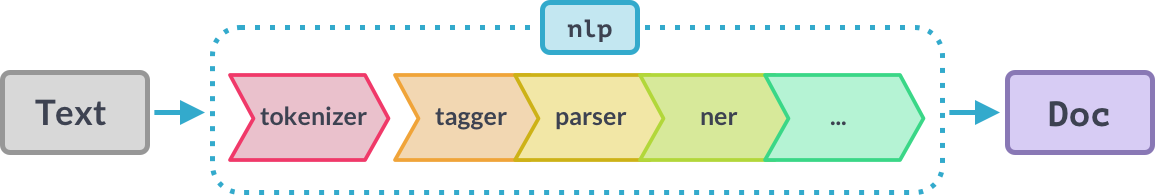

In [30]:
# List the components for the current nlp pipeline
print(nlp.pipe_names)

# Print the names and their corresponding objects
print(nlp.pipeline)

[]
[]


You can also create your own components. Each pipeline component is a function or callable that takes a doc, modifies it and returns it, so it can be processed by the next component in the pipeline.

To tell spaCy where to find your custom component and how it should be called, you can decorate it using the @Language.component decorator. 
 Once a component is registered, it can be added to the pipeline using the nlp.add_pipe method. The method takes at least one argument: the string name of the component.

Below, we create a custom component that will print the length of the document as part of processing it.

In [31]:
from spacy.language import Language

# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

# Run pipeline
doc = nlp("A sample sentence.")

Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Doc length: 4


# Task 2

We're going to combine several ideas from above in this task. Implement a new pipeline component that uses a matcher to find the following insects:

- flies
- mosquitos
- moths

Your matcher should then modify the documents entities to have a span for each insect, with the label `INSECT`. Remember to use lemmas to account for different ways of writing an insect's name and to use POS tags to ensure you only identify nouns.

Run your new pipeline on the provided text.

In [32]:
text = "Qantas flies all sorts of cargo! That includes moths, mosquitos, and even the occasional fly. Mosquitos are particular hard to transport safely."

# TODO

# Solution
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
for insect in ["moth", "fly", "mosquito"]:
    pattern = [{"POS": "NOUN", "LEMMA": insect}]
    matcher.add("INSECT", [pattern])

# Define the custom component
@Language.component("insect_component")
def insect_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "INSECT"
    spans = [Span(doc, start, end, label="INSECT") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc

# Add the component to the pipeline after the "ner" component
nlp.add_pipe("insect_component", after="ner")

# Process the text and print the text and label for the doc.ents
doc = nlp(text)
print([(ent.text, ent.label_) for ent in doc.ents])

[('moths', 'INSECT'), ('mosquitos', 'INSECT'), ('fly', 'INSECT'), ('Mosquitos', 'INSECT')]


# Word Vectors

spaCy can compare two objects and predict how similar they are – for example, documents, spans or single tokens. The Doc, Token and Span objects have a .similarity method that takes another object and returns the cosine similarity of their representations.

For words, the word vector is its representation. For spans and docs, the average of word vectors for the words inside them is used.

One thing that's very important: In order to use similarity, you need a larger spaCy pipeline that has word vectors included. Of the ones we've used so far, `en_core_web_md` does have word vectors, but `en_core_web_sm` does not.

In [33]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

# Look at one word vector
doc = nlp("I love chocolate")
print(doc[2].vector)

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print("Comparing sentences:", doc1.similarity(doc2))

# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print("Comparing 'pizza' and 'paste':", token1.similarity(token2))

[-7.5251e-01 -3.3480e+00 -2.9293e+00  3.6773e+00  6.7698e-01 -4.6221e+00
  1.7471e+00  2.9072e+00 -1.1218e+00  1.9050e+00  6.1861e+00 -1.5307e+00
 -2.1315e-01 -4.9000e-01  3.1568e+00 -3.2417e+00  9.3068e-02 -1.6506e+00
  1.8947e+00 -3.6223e+00 -1.4505e+00  2.8421e+00 -1.6908e+00 -4.7524e-01
 -5.5192e+00 -1.5492e+00 -3.2481e+00  4.3969e+00 -9.3570e-01  1.1385e+00
  2.3373e+00  2.3882e+00 -1.5618e+00 -7.5315e-01 -5.9527e-01 -1.9020e+00
  1.0459e+00  2.2420e-01 -9.4108e-01  4.8844e-01 -2.2083e+00  2.5857e+00
  2.2875e+00  6.3069e-01  3.4058e+00  2.0758e+00 -1.0663e+00 -8.4464e-01
 -5.2534e-02 -7.9447e-01  3.0140e+00 -8.9454e-01  2.1576e+00 -3.0407e+00
  1.3439e+00 -2.1920e-01 -6.2846e-02  1.1478e+00  2.8001e+00  2.6444e+00
  2.6262e+00  2.2010e-02  1.4596e+00 -1.1558e+00  1.8789e-01  9.4600e-01
 -2.9744e+00 -2.2531e+00  7.7054e-01 -5.4315e-01 -2.2618e+00  2.2210e+00
 -1.2964e+00  1.0105e+00  5.8169e-01  3.5617e-01 -2.4568e-01 -2.0808e+00
  3.5410e+00 -5.2889e-01 -2.8393e-01  4.8163e-01  1

# Useful Tips

**Fast Processing** - If you need to process a lot of texts and create a lot of `Doc` objects in a row, the `nlp.pipe` method can speed this up significantly. It processes the texts as a stream and yields Doc objects.

In [34]:
LOTS_OF_TEXTS = ["First example!", "Second example."]

for doc in nlp.pipe(LOTS_OF_TEXTS):
    print(doc)

First example!
Second example.


**Context** - If you want to keep some information associated with each document, you can specify a context and it will be passed through the nlp pipe command. You can then write code to save it as a new property of the document.

In [35]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

# Define new class members for the document
try:
    Doc.set_extension("id", default=None)
    Doc.set_extension("page_number", default=None)
except ValueError:
    print("Catching an error that happens if you run this cell of the notebook twice.")
    
# Put values in the class as we iterate over the documents
for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]
    print(doc.text, doc._.id)

This is a text 1
And another text 2


**Skip Pipeline Steps** - Sometimes you don't need all of the spaCy components. Skip some 

In [36]:
doc = nlp("This is a fun course.")
print("Tags with normal pipeline:", [t.tag_ for t in doc])

# Create a doc, but don't run any pipeline steps
doc = nlp.make_doc("This is a fun course.")
print("Tags with just make_doc:", [t.tag_ for t in doc])

text = """Chick-fil-A is an American fast food restaurant chain headquartered in 
the city of College Park, Georgia, specializing in chicken sandwiches."""

# Disable the tagger and lemmatizer
with nlp.select_pipes(disable=["tagger", "parser"]):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print(doc.ents)
    print("Tags without tagger:", [t.tag_ for t in doc])

Tags with normal pipeline: ['DT', 'VBZ', 'DT', 'NN', 'NN', '.']
Tags with just make_doc: ['', '', '', '', '', '']
(Chick-fil-A, American, College Park, Georgia)
Tags without tagger: ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '_SP', '', '', '', '', '', '', '', '', '', '', '', '', '']


/Users/jkum0593/teaching/comp5046-2024/env-5046/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
